In [275]:
#Importamos las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [252]:
df_house = pd.read_csv('house_train_raw.csv')

In [253]:
df_house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


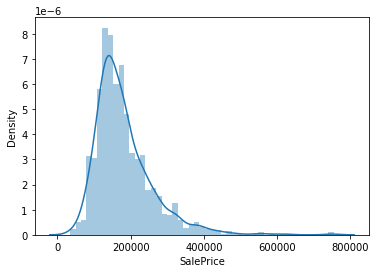

In [254]:
#graficamos el histograma del salerprice
sns.distplot(df_house['SalePrice'])
plt.show()


In [255]:
#Separamos las variables categoricas y las variables numericas
df_house_cat = df_house.select_dtypes(include=['object'])
df_house_num = df_house.select_dtypes(include=['int64','float64'])


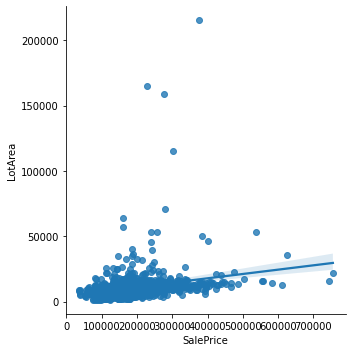

In [256]:
#graficamos la dispersion del salerprice con respecto al area del lote
tips = df_house_num
g = sns.lmplot(x='SalePrice', y='LotArea', data=tips)

In [257]:
#corroboramos las dimensiones del dataframe
df_house_cat.shape

(1460, 43)

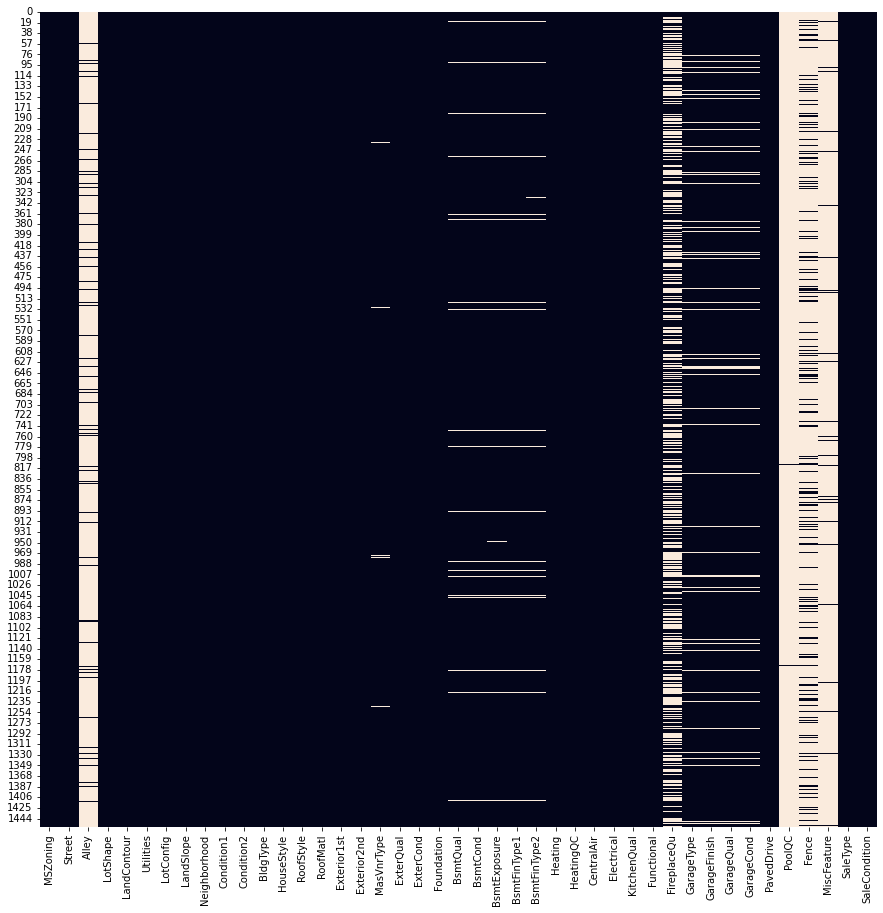

In [258]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_cat.isnull(), cbar=False)
plt.show()

Cada linea blanca indica un valor nulo, imputamos esos valores a continuacion.

In [259]:
#eliminamos las filas con mayor cantidad de valores nulos
df_house_cat=df_house_cat.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1)

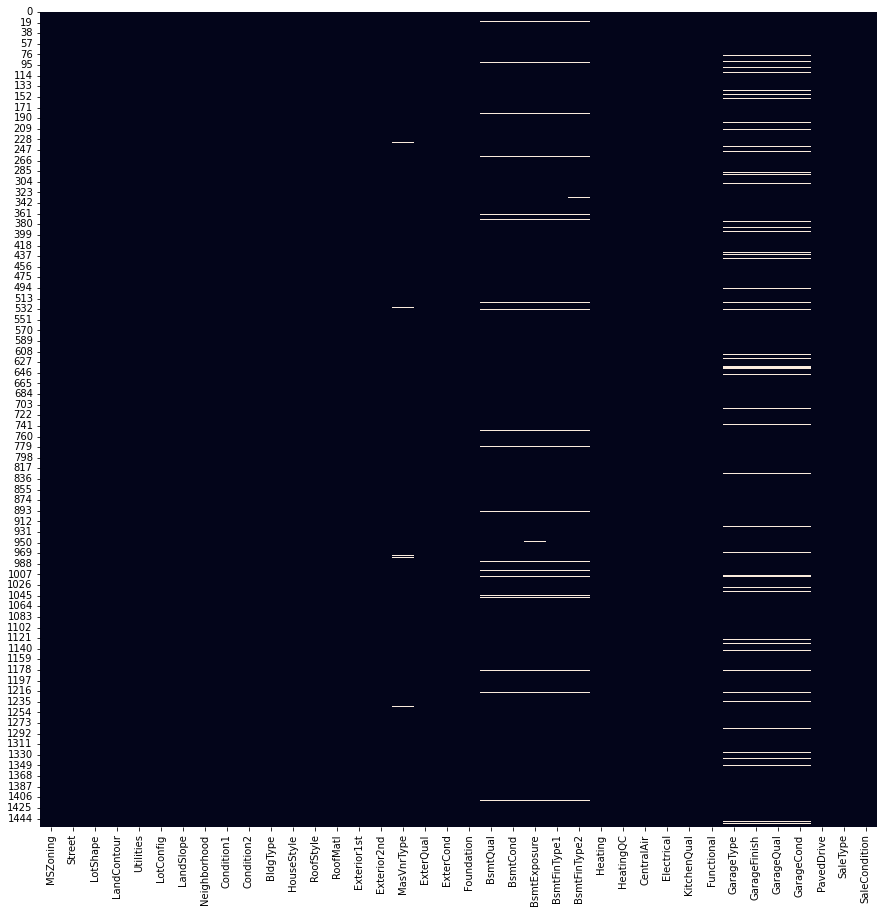

In [260]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_cat.isnull(), cbar=False)
plt.show()

Cada linea blanca indica un valor nulo, imputamos esos valores a continuacion.

In [261]:
#corroboramos las dimensiones del dataframe
df_house_cat.shape

(1460, 38)

In [262]:
#imputamos nan a los valores nulos
df_house_cat=df_house_cat.fillna('None')


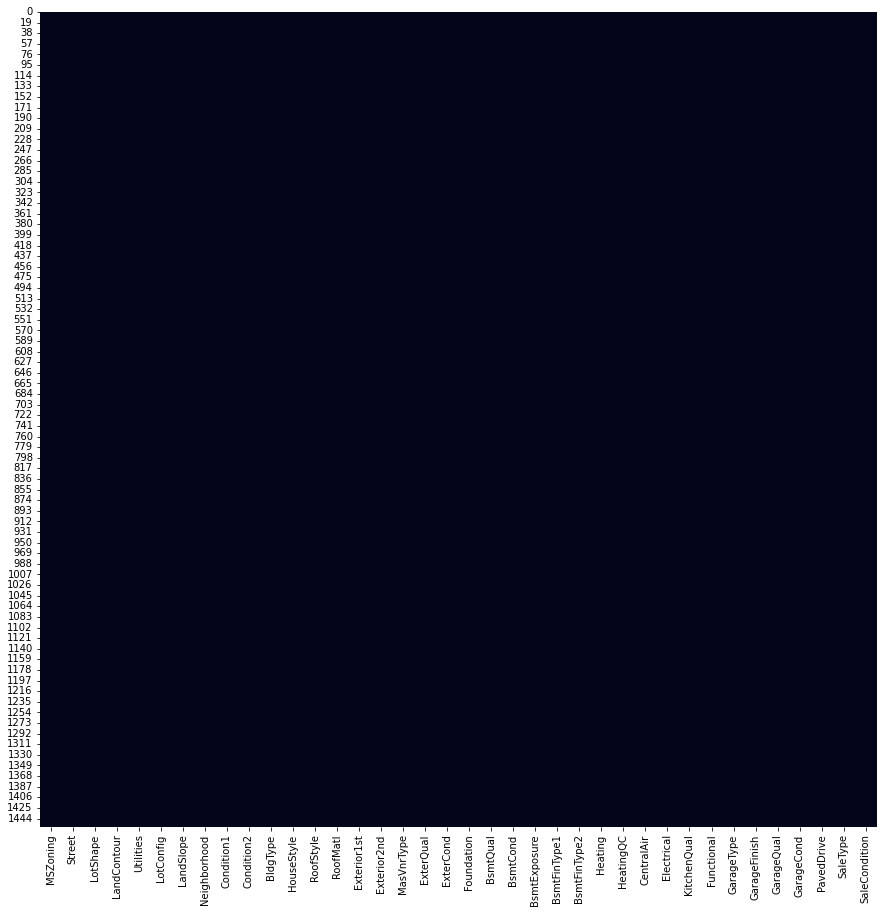

In [263]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_cat.isnull(), cbar=False)
plt.show()

Podemos observar el dataframe sin valores nulos

In [264]:
df_house_cat.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [265]:
df_house_num.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500


In [266]:
#imputamos los valores medios de las variables numericas
df_house_num.fillna(df_house_num.mean(), inplace=True)
df_house_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

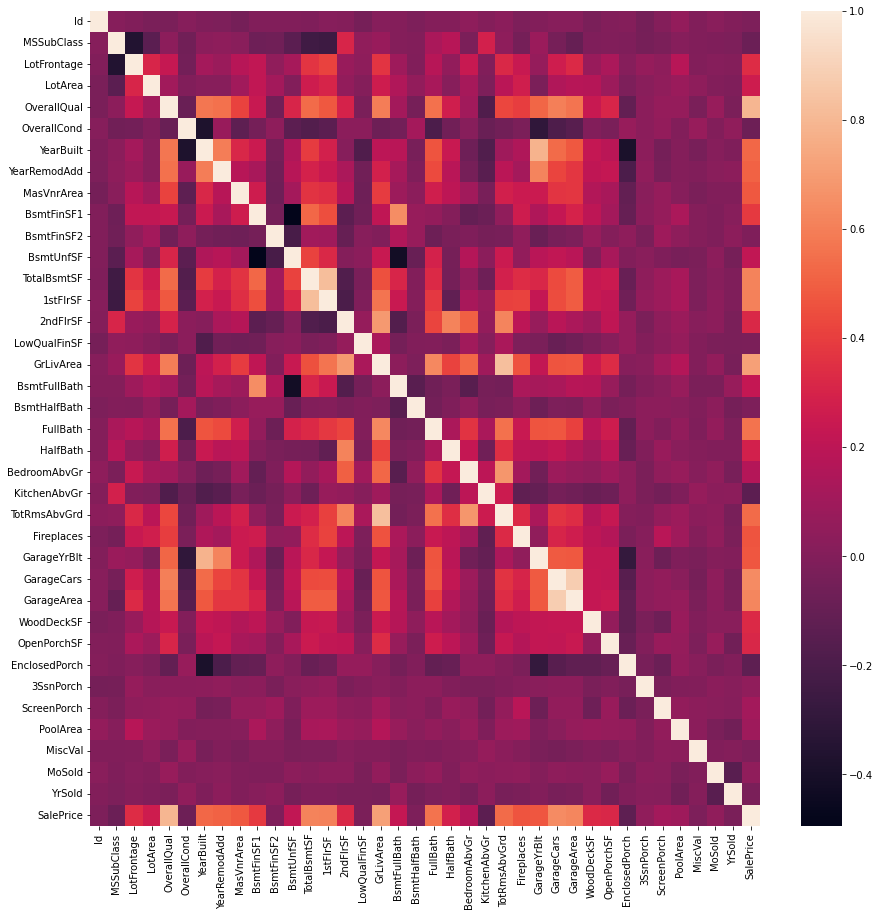

In [267]:
#graficamos el heatmap de la matriz de correlacion
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_num.corr())
plt.show()


In [268]:
#Creamos el dataframe de features que vamos a utilizar y el de target
df_features = df_house_num[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]
df_target = df_house_num['SalePrice']

## Probamos el modelo random forest classifier

In [269]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
#imputamos los valores medios de las variables numericas
df_house_num.fillna(df_house_num.mean(), inplace=True)
df_house_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [271]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_house_num[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]
y = df_house_num['SalePrice']

In [272]:
#creamos los grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [273]:
#instanciamos el modelo y lo entrenamos
clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

In [277]:
#evaluamos el desempeño del modelo en el conjunto de prueba
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9960861056751468
0.0091324200913242


In [278]:
clf.score(X_train,y_train)

0.9960861056751468

In [279]:
RMSLE = mean_squared_log_error(y_test, y_test_pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.21833662375353835


In [280]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test,  y_test_pred)

26050.310502283104

#### Podemos ver que el accuracy_score es alto para el conjunto de entrenamiento pero bajo para el conjunto de testeo, eso podria indicar que el modelo esta en overfitting.

## Probamos el modelo Random Forest Regressor

In [281]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_house_num[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]
y = df_house_num['SalePrice']

In [282]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

In [283]:
#Instanciamos el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
#entrenamos el modelo
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [284]:
model.predict(X_test)

array([142602.5       , 286928.72      , 129987.5       , 175719.4       ,
       331234.95      ,  83012.5       , 202980.3       , 154535.        ,
        81191.5       , 119800.69      , 150731.5       , 116701.14      ,
       105218.5       , 208256.5       , 176263.32      , 129066.25      ,
       202598.05      , 138195.        , 130344.        , 217214.16      ,
       166431.39      , 229621.12      , 182706.64      , 125825.86      ,
       201589.17      , 177862.99      , 176418.01      ,  99813.5       ,
       181000.        , 191465.82333333, 118851.03      , 260924.35      ,
       169194.39      , 107140.75      , 280950.68      , 140166.24      ,
       134544.34      , 209832.58333333, 305570.73      , 100834.5       ,
       144907.5       , 211954.9       , 122272.5       , 350161.41      ,
       136276.7       , 139022.2       , 115418.33      , 125300.82      ,
       436235.95      , 128809.33      , 126092.83      , 202004.88      ,
       105064.64      , 3

In [285]:
#verivicamos el rendimiento del modelo
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.8644569973832898


In [286]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = model.predict(X_test)

In [287]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.028263559490689615


In [288]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

20527.80289954338

In [289]:
RMSE=mean_squared_error(y_test, y_pred, squared=False)
print('Error medio: ', RMSE) 

Error medio:  32243.744279655002


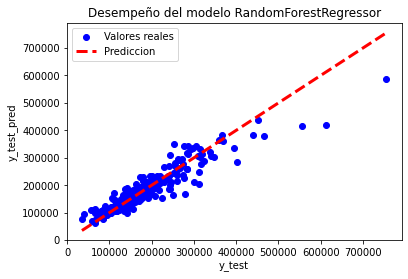

In [290]:
#graficamos el desempeño del modelo RandomForestRegressor 
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo RandomForestRegressor')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

## Probamos el modelo Lasso de regresion

In [291]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_house_num[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]
y = df_house_num['SalePrice']

In [292]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [293]:
#instanciamos el modelo
lasso = Lasso()

In [294]:
#entrenamos el modelo
lasso.fit(X_train, y_train)

Lasso()

In [295]:
#Predecimos los valores
predict = lasso.predict(X_test)

In [296]:
lasso.score(X_test, y_test)

0.7952342993480972

In [297]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = lasso.predict(X_test)

In [327]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred, squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.1554764874817156


In [328]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

18348.733002283105

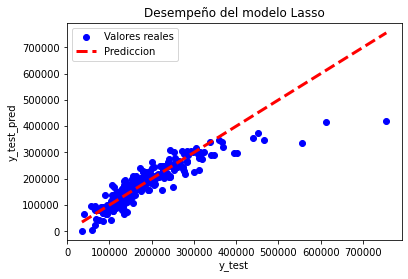

In [300]:
#graficamos el desempeño del modelo de regresion Lasso 
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo Lasso')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

## Vamos a trabajar con un dataframe sin nulos y con todas las columnas 


In [301]:
#concatenamos los df numericos y categoricos sin nulos 
df_house_sin_nulos = pd.concat([df_house_num, df_house_cat], axis=1)

In [302]:
df_house_sin_nulos.shape

(1460, 76)

In [303]:
#eliminamos las varaibles categoricas que no utilizaremos
df_house_sin_nulos = df_house_sin_nulos.drop(['LotShape', 'LandSlope', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish'], axis=1)

In [304]:
df_house_cat.shape

(1460, 38)

In [305]:
df_house_sin_nulos.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,1Fam,2Story,Gable,Gd,TA,PConc,Gd,TA,GasA,Ex,Y,SBrkr,Gd,Typ,TA,TA,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,1Fam,1Story,Gable,TA,TA,CBlock,Gd,TA,GasA,Ex,Y,SBrkr,TA,Typ,TA,TA,Y,WD,Normal


In [306]:
#Codificamos las variables categoricas para aplicar el modelo de regresion 
for col in df_house_sin_nulos.columns:
  if(df_house_sin_nulos[col].dtype == 'object'):
      le=LabelEncoder()
      df_house_sin_nulos[col]=le.fit_transform(df_house_sin_nulos[col])

In [307]:
df_house_sin_nulos.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,1,3,0,4,5,2,0,5,1,2,4,2,2,4,1,0,1,5,2,6,5,5,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,3,1,3,0,2,24,1,0,2,1,3,4,1,2,4,1,0,1,5,3,6,5,5,2,8,4


In [308]:
#Ordenamos las variables por el grado de correlacion que tienen con el target
cor= df_house_sin_nulos[:].corr()
cor=cor.sort_values(['SalePrice'],ascending=False)


In [309]:

cor.SalePrice.head(40)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
GarageCond       0.246705
Electrical       0.237044
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
GarageQual       0.205963
HouseStyle       0.180163
BedroomAbvGr     0.168213
ExterCond        0.117303
Functional       0.115328
ScreenPorch      0.111447
PoolArea         0.092404
BsmtCond    

In [330]:
#Tomamos las variables que tienen un grado de correlacion mayor a 0.1
#y definimos las features que vamos a utilizar y el target
df_house_feat = df_house_sin_nulos[['OverallQual','GarageArea','GarageCars',
'TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd',
'Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','GarageYrBlt','Foundation','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF',
'HalfBath','LotArea','CentralAir','GarageCond','Electrical','PavedDrive','BsmtFullBath',
'RoofStyle','BsmtUnfSF','SaleCondition','Neighborhood','GarageQual','HouseStyle',
'BedroomAbvGr','ExterCond','Functional','ScreenPorch','PoolArea']]

df_house_target = df_house_sin_nulos['SalePrice']


### Aplicamos el modelo que nos dio menor error

In [331]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_house_feat, df_house_target, test_size=0.2, random_state=42)

In [332]:
#Instanciamos el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
#entrenamos el modelo
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [333]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = model.predict(X_test)
y_pred

array([138644.        , 297039.41      , 127859.        , 151667.4       ,
       333114.22      ,  86140.25      , 206719.65      , 148889.        ,
        84894.25      , 123502.25      , 150699.47      , 123581.49      ,
       112987.        , 199119.89      , 175545.        , 131097.25      ,
       194067.9       , 131141.25      , 120762.        , 215116.84      ,
       160231.        , 225272.64      , 179124.41      , 122875.75      ,
       197052.61      , 180193.        , 185565.24      , 107816.5       ,
       173782.96      , 185685.87      , 123704.56      , 253201.43      ,
       175760.62      , 108894.5       , 270939.51      , 146520.36      ,
       146516.92      , 209670.9       , 308482.02      , 111812.86      ,
       131057.        , 218212.14      , 125058.83      , 343734.21      ,
       132535.33      , 168844.52      , 111448.62      , 126286.26      ,
       391057.11      , 142575.6       , 118587.49      , 197409.        ,
       121179.31      , 3

In [314]:
#verivicamos el rendimiento del modelo
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.8891451739336289


In [315]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.1554764874817156


In [316]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

18348.733002283105

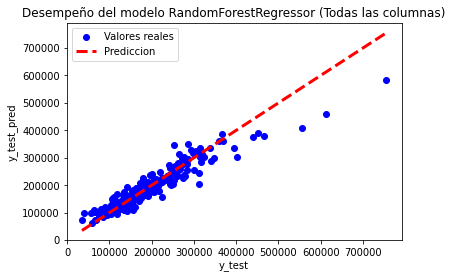

In [317]:
#graficamos el desempeño del modelo de regresion RandomForestRegressor con todas las columnas
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo RandomForestRegressor (Todas las columnas)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

# Probamos el modelo con el dataset de teteso

In [318]:
#cargamos el dataframe de test
df_test =pd.read_csv('houses_test_raw.csv')

In [319]:
#Seleccionamos las columnas que vamos a utilizar para la prediccion
df_test_res = df_test[['OverallQual','GarageArea','GarageCars',
'TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd',
'Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','GarageYrBlt','Foundation','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF',
'HalfBath','LotArea','CentralAir','GarageCond','Electrical','PavedDrive','BsmtFullBath',
'RoofStyle','BsmtUnfSF','SaleCondition','Neighborhood','GarageQual','HouseStyle',
'BedroomAbvGr','ExterCond','Functional','ScreenPorch','PoolArea']]

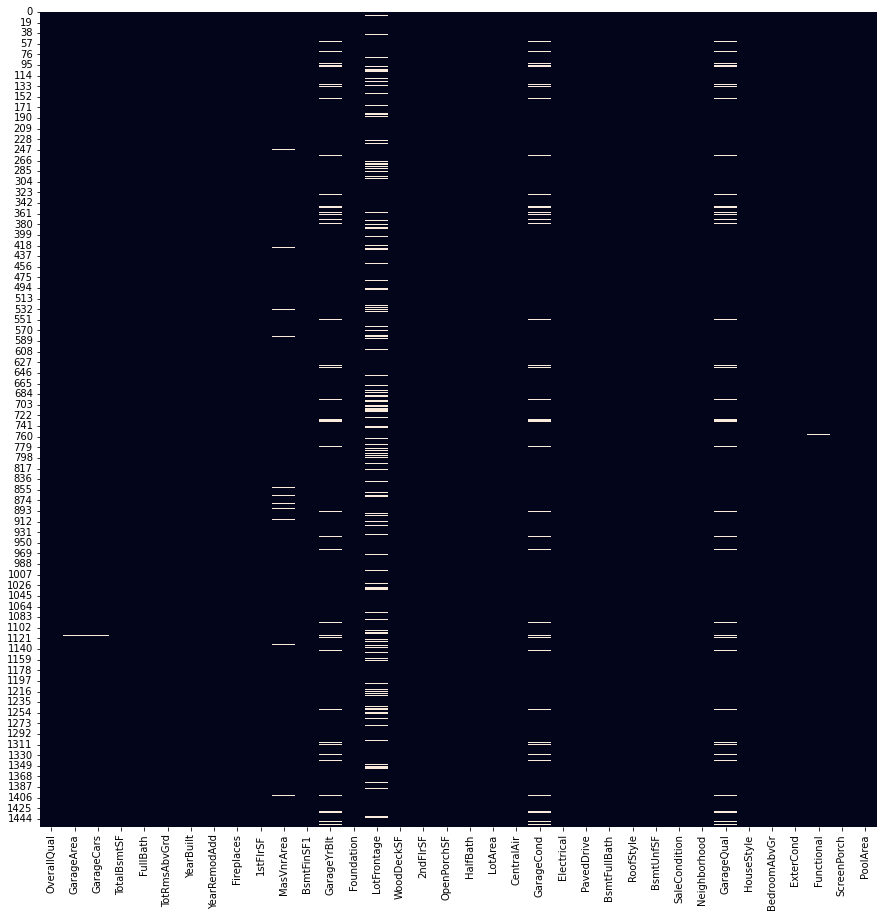

In [320]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_test_res.isnull(), cbar=False)
plt.show()

Cada linea blanca indica un valor nulo, imputamos esos valores a continuacion.

In [321]:
#imputamos los valores medios de las variables numericas
df_test_res.fillna(df_test_res.mean(), inplace=True)
df_test_res.isnull().sum()

OverallQual       0
GarageArea        0
GarageCars        0
TotalBsmtSF       0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
Fireplaces        0
1stFlrSF          0
MasVnrArea        0
BsmtFinSF1        0
GarageYrBlt       0
Foundation        0
LotFrontage       0
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
HalfBath          0
LotArea           0
CentralAir        0
GarageCond       78
Electrical        0
PavedDrive        0
BsmtFullBath      0
RoofStyle         0
BsmtUnfSF         0
SaleCondition     0
Neighborhood      0
GarageQual       78
HouseStyle        0
BedroomAbvGr      0
ExterCond         0
Functional        2
ScreenPorch       0
PoolArea          0
dtype: int64

In [322]:
#imputamos nan a los valores nulos a las features categoricas
df_test_res=df_test_res.fillna('None')


In [323]:
df_test_res.isnull().sum()

OverallQual      0
GarageArea       0
GarageCars       0
TotalBsmtSF      0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
Fireplaces       0
1stFlrSF         0
MasVnrArea       0
BsmtFinSF1       0
GarageYrBlt      0
Foundation       0
LotFrontage      0
WoodDeckSF       0
2ndFlrSF         0
OpenPorchSF      0
HalfBath         0
LotArea          0
CentralAir       0
GarageCond       0
Electrical       0
PavedDrive       0
BsmtFullBath     0
RoofStyle        0
BsmtUnfSF        0
SaleCondition    0
Neighborhood     0
GarageQual       0
HouseStyle       0
BedroomAbvGr     0
ExterCond        0
Functional       0
ScreenPorch      0
PoolArea         0
dtype: int64

In [324]:
#Codificamos las variables categoricas para aplicar el modelo de regresion 
for col in df_test_res.columns:
  if(df_test_res[col].dtype == 'object'):
      le=LabelEncoder()
      df_test_res[col]=le.fit_transform(df_test_res[col])

In [329]:
df_test_res.head(2)

,OverallQual,GarageArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,1stFlrSF,MasVnrArea,BsmtFinSF1,GarageYrBlt,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir,GarageCond,Electrical,PavedDrive,BsmtFullBath,RoofStyle,BsmtUnfSF,SaleCondition,Neighborhood,GarageQual,HouseStyle,BedroomAbvGr,ExterCond,Functional,ScreenPorch,PoolArea
0,5,730.0,1.0,882.0,1,5,1961,1961,0,896,0.0,468.0,1961.0,1,80.0,140,0,0,0,11622,1,5,3,2,0.0,1,270.0,4,12,4,2,2,4,7,120,0
1,6,312.0,1.0,1329.0,1,6,1958,1958,0,1329,108.0,923.0,1958.0,1,81.0,393,0,36,1,14267,1,5,3,2,0.0,3,406.0,4,12,4,2,3,4,7,0,0


In [334]:
#obtenemos los valores predicho
df_resultado = model.predict(df_test_res)


In [335]:
df_resultado

array([125850.  , 159178.  , 159175.3 , ..., 181053.87, 116923.5 ,
       225731.48])

In [ ]:
df_resultado.to_csv('./out/pred_test.csv',index=False)